# Laboratorio 1: Acceso a datos mediante pandas

En esta práctica accederemos a la Wikipedia para recabar los datos de población de un conjunto de países y realizaremos algunas representaciones gráficas.

En la página web titulada "List of countries by past and future population" se muestra la evolución de un buen número de países y territorios del mundo entre 1950 y 2050, organizada en un conjunto de tablas. En esta práctica combinaremos los datos de todos los países-territorios y todos los años en una sola trama de datos de panda, y visualizaremos los cambios en la población de los distintos países-territorios.

### Utilizaremos en esta práctica las siguientes librerías: 
[pandas](http://pandas.pydata.org/) proporciona estructuras de datos fáciles de usar y funciones de acceso a datos desde múltiples fuentes y formatos.  
[matplotlib](matplotlib.org) permite generar múltiples tipos de gráficos.  
 

### Realizaremos esta práctica en los siguientes pasos:

* Reunir los datos en una trama de datos panda
* Visualizar los datos

A continuación indicamos algunas operaciones iniciales para incorporar al proyecto algunas librerías útiles

In [ ]:
# comando IPython para preparar el cuaderno para matplotlib
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt


## Extraer las tablas a partir de un documento html de la Wikipedia
Utilizaremos el método read_html() de la librería pandas para leer las tablas que hay en el fichero html

In [ ]:
# Ojo, en este documento html el separador de miles es una coma
url = "https://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population"
population_tables = pd.read_html(url, index_col=0, thousands=',')[:-1]

# Imprimimos el número de tablas que hemos leído con datos de países mediante la función len(). Deberían ser 3.
print("Número de tablas: {}".format(len(population_tables)))

## Construimos una sola tabla con la información de población
Reunimos las tablas con los diferentes periodos en una sola tabla, mediante los métodos de pandas join(), merge(), o concat(), extraemos la cabecera y seleccionamos las columnas que corresponden solamente a fechas. Podemos utilizar el método head() para inspeccionar las primeras filas de la tabla y que la salida sea más manejable.

In [47]:
# Reunimos las tres tablas en una sola.
population_table = population_tables[0].join(population_tables[1], rsuffix='_overlap')
population_table = population_table.join(population_tables[2], rsuffix='_overlap')

# Imprimimos las primeras filas a modo de comprobación, mediante head()
print(population_table.head())

# Generamos una lista con la información almacenada en las columnas mediante list()
columns = list(population_table)

# Seleccionamos de la cabecera las columnas correspondientes a las fechas mediante isnumeric() 
# Puede ser útil el utilizar la noción de 'list comprehension' por sencillez
dates = [ (c) for c in columns if c.isnumeric()]

# Leemos la tabla por fechas y la almacenamos para su uso. Imprimimos para verificar que es correcto
population = population_table[dates]
print(population.head())


                                  1950  1955     %   1960   %.1   1965    %.2  \
Country (or dependent territory)                                                
Afghanistan                       8151  8892  1.76   9830  2.03  10998   2.27   
Albania                           1228  1393  2.56   1624  3.12   1884   3.02   
Algeria                           8893  9842  2.05  10910  2.08  11964   1.86   
American Samoa                      20    20  0.72     21  0.20     25   4.23   
Andorra                              7     7  0.04      9  6.28     14  10.17   

                                   1970   %.3   1975  ...   2030  %.2_overlap  \
Country (or dependent territory)                      ...                       
Afghanistan                       12431  2.48  14133  ...  45665         2.12   
Albania                            2157  2.74   2402  ...   3103        -0.01   
Algeria                           13932  3.09  16141  ...  48149         0.99   
American Samoa             

## Algunas funciones de acceso a datos para una trama de pandas
Jugaremos con las posibilidades de pandas para manejar tablas mediante un conjunto sencillo de ejercicios.

### Ejercicio 1
Imprimir la tabla correspondiente a las poblaciones de Alemania, Andorra y Angola desde 2015 a 2025.

In [52]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .loc
print(population.loc[['Germany', 'Andorra', 'Angola'], '2015':'2025'])

                                   2015   2020   2025
Country (or dependent territory)                     
Germany                           80855  82983  80027
Andorra                              86     86     86
Angola                            19626  22485  25674


### Ejercicio 2
Imprimir la subtabla que va desde las filas 3 a 8 y desde las columnas 5 a 9.

In [54]:
# Creamos una subtabla a partir de una indexación mediante el uso de la opción .iloc
print(population.iloc[2:8, 4:9])

                                   1970   1975   1980   1985   1990
Country (or dependent territory)                                   
Algeria                           13932  16141  18807  22009  25191
American Samoa                       28     30     33     39     48
Andorra                              20     27     34     45     53
Angola                             5606   6051   7206   8390   9486
Anguilla                              7      7      7      7      9
Antigua and Barbuda                  66     69     69     65     65


### Ejercicio 3
Imprimir la columna correspondiente al año 1955.

In [61]:
# Creamos una columna mediante selección por el título de la columna
print("Población de 1955\n{}".format(population['1955']))

Población de 1955
Country (or dependent territory)
Afghanistan          8892
Albania              1393
Algeria              9842
American Samoa         20
Andorra                 7
                   ...   
Western Sahara         16
Yemen                5266
Zambia               2870
Zimbabwe             3410
World             2782099
Name: 1955, Length: 228, dtype: int64


### Ejercicio 4
Imprimir los datos de la fila número 15.

In [59]:
# Seleccionamos una fila mediante la opción .iloc
print(population.iloc[14])

1950     71
1955     88
1960    113
1965    140
1970    171
1975    190
1980    210
1985    229
1990    246
1995    266
2000    283
2005    297
2010    311
2015    325
2020    338
2025    350
2030    359
2035    365
2040    369
2045    372
2050    372
Name: Bahamas, dtype: int64


### Ejercicio 5
Imprimir la población de Barbados en 1995.

In [62]:
# Seleccionamos una celda mediante la opción .loc
print("Barbados\n{}".format(population.loc['Barbados', '1995']))

Barbados
268


### Ejercicio 6
Imprimir el valor máximo de las poblaciones de 1975 e identificar el país correspondiente.

In [81]:
# Utilizamos la función drop() para eliminar los valores totales mundiales
population = population.drop('World')

# Utilizamos la función max() para calcular el máximo
max_1975 = population['1975'].max()

# Utilizamos idxmax() para identificar el país que corresponde al valor máximo
max_1975_country = population['1975'].idxmax()
print("{}\n{}".format(max_1975, max_1975_country))

920295
China


### Ejercicio 7
Imprimir los nombres de las filas.

In [68]:
# Utilizamos la opción .index
print(population.index)

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia',
       ...
       'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam',
       'Wallis and Futuna', 'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country (or dependent territory)', length=227)


## Dibujar la población de 4 países en un año
Dibujar mediante un diagrama de barras la población de Argentina, Suecia, Polonia y Libia en 1995, ordenadas de menor a mayor, utilizando las librerías matplotlib.

<BarContainer object of 4 artists>

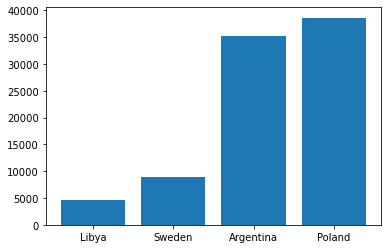

In [88]:
# Mediante la función plt.bar() de las librerías matplotlib
countries = population.loc[['Argentina', 'Sweden', 'Poland', 'Libya'], '1995'].sort_values()
plt.bar(countries.index, countries)

Text(0.5, 0, 'País (o territorio dependiente)')

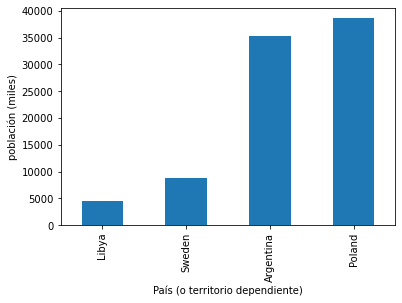

In [94]:
# Generamos una lista con los nombres de los países del enunciado
countries = ['Argentina', 'Sweden', 'Poland', 'Libya']

# Utilizamos la opción .loc para seleccionar la subtabla que dibujaremos
data = population.loc[countries, '1995']

# Utilizamos la función .sort_values() para ordenar la subtabla y .plot(kind='bar') para dibujar    
data.sort_values().plot(kind='bar')

# Podemos utilizar plt.ylabel() para especificar 'población (miles)'
plt.ylabel('población (miles)')
# Podemos utilizar plt.xlabel() para especificar 'País (o territorio dependiente)'
plt.xlabel('País (o territorio dependiente)')

## Dibujar la evolución de la población de 4 países
Dibujar la evolución de la población en todo el periodo para los siguientes países: Alemania, España, Estados Unidos e Italia.

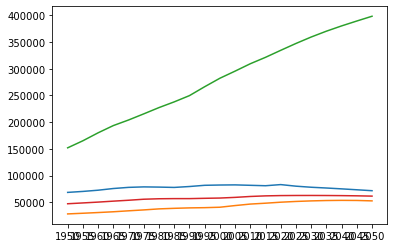

In [120]:
# Mediante la función plot de las librerías matplotlib
countries = population.loc[['Germany', 'Spain', 'United States', 'Italy']].transpose()
plt.plot(countries.index, countries)


Text(0.5, 0, 'Año')

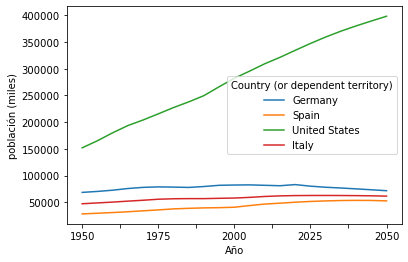

In [98]:
# Generamos una lista con los nombres de los países del enunciado
countries = ['Germany', 'Spain', 'United States', 'Italy']

# Generamos la subtabla correspondiente con la opción .loc
data = population.loc[countries].transpose()
    
# Utilizamos la función plot(kind='line') para dibujar
data.plot(kind='line')

# Etiquetamos con plt.xlabel() y plt.ylabel()
plt.ylabel('población (miles)')
plt.xlabel('Año')

## Dibujar la evolución de los 5 países más populosos hasta 2010 y 2050  
Dibujar dos gráficas: una con la evolución para todo el período de los países más populosos en 2010, y otra con los países más populosos en 2050. Utilizaremos una función plot_populosos() a la que daremos como argumento el año de interés.

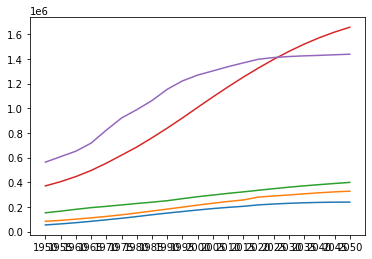

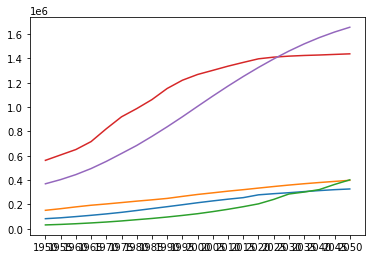

In [123]:
# Mediante la función plot de las librerías matplotlib
def plot_populosos(taboa, ano):
    # Ordenamos la tabla según el año
    data = taboa.sort_values(ano)
    countries = data[ano].iloc[-5:].index
    data = taboa.loc[countries].transpose()
    plt.plot(data.index, data)
    plt.show()

plot_populosos(population, '2010')
plot_populosos(population, '2050')

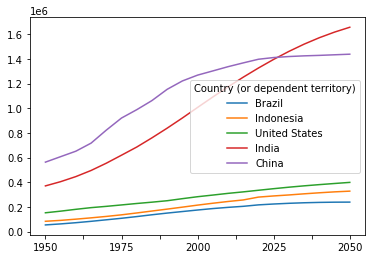

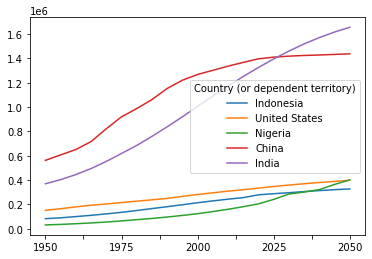

In [121]:
# Definimos la funión plot_populosos()
def plot_populosos(taboa, ano):
    
    # Ordenamos la tabla según el año
    data = taboa.sort_values(ano)
    
    # Seleccionamos los cinco primeros países mediante .iloc, y extraemos sus nombres
    countries = data[ano].iloc[-5:].index
    
    # Utilizamos los nombres para invocar la subtabla mediante .loc y dibujamos mediante plot(kind='line')
    taboa.loc[countries].transpose().plot(kind='line')

# Aquí invocamos la función plot_populosos()
# Para ello, debemos eliminar en primer lugar los valores mundiales
plot_populosos(population, '2010')
plot_populosos(population, '2050')
